In [ ]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

# Reading and extracting the data from local directory
data = pd.read_csv('amz_uk_price_prediction_dataset.csv')

Part 1: Understanding Product Categories

Business Question: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

In [ ]:
# Shortening the column name for visualization purposes
data['category'] = data['category'].replace('Handmade Clothing, Shoes & Accessories', 'HM C,S,A')

In [ ]:
# Frequency table for 'category'
frequency_table = data['category'].value_counts()

# Calculating the proportion of each unique value in the 'category'
proportion_table = data['category'].value_counts(normalize=True)

# Display only the top 5 values
top_5_frequency_table = frequency_table.head(5)
top_5_proportion_table = proportion_table.head(5)

print(top_5_frequency_table)
print("--------------------------------------------------")
print(top_5_proportion_table)

category
Sports & Outdoors    836265
Beauty                19312
HM C,S,A              19229
Bath & Body           19092
Birthday Gifts        18978
Name: count, dtype: int64
--------------------------------------------------
category
Sports & Outdoors    0.342219
Beauty               0.007903
HM C,S,A             0.007869
Bath & Body          0.007813
Birthday Gifts       0.007766
Name: proportion, dtype: float64


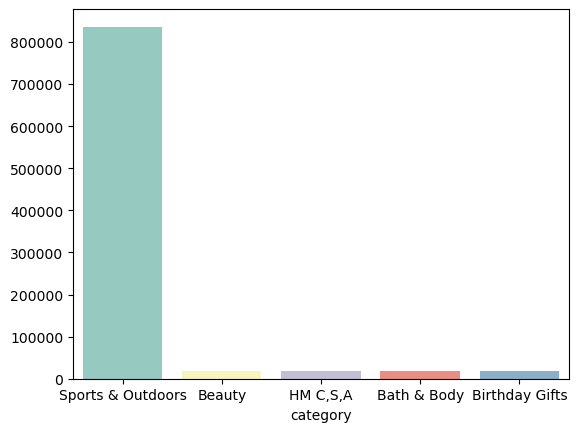

In [ ]:
# Plotting a bar chart using the top 5 values from the frequency table
sns.barplot(x=top_5_frequency_table.index, y=top_5_frequency_table.values, palette="Set3");

<Axes: ylabel='count'>

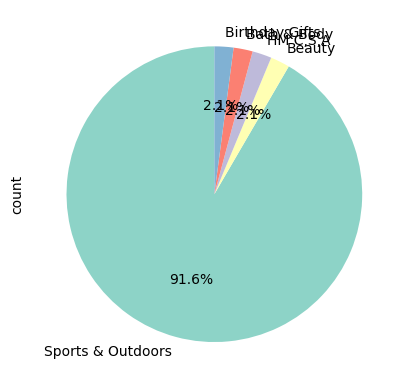

In [ ]:
# Plotting a pie chart using the top 5 values from the frequency table
top_5_frequency_table.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))

The 'Sports & Outdoors' category dominates the number of occurrences relative to the other categories. The difference is so much that it can be clearly seen in the visualizations above. The dominant category has over 800,000 ocurrences while the other categories don't even break the 20,000 mark. Amazon UK seems to be highly focused on the Sporting goods and/or the UK residents are just huge outdoor people.

Part 2: Delving into Product Pricing

Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

In [ ]:
# Displaying the top 10 most expensive prices
data['price'].sort_values(ascending=False).head(10)

2008013    100000.00
1987238     77752.00
1905315     24674.59
1408966     23482.73
319555      22933.42
1490285     21999.00
1490286     21999.00
1907272     21464.82
1907271     21464.82
1907273     21464.82
Name: price, dtype: float64

In [ ]:
# Measures of centrality
mean_price = filtered_data['price'].mean()
median_price = filtered_data['price'].median()
mode_price = filtered_data['price'].mode()[0]

print(f"Mean Price: {mean_price}")
print(f"Median Price: {median_price}")
print(f"Mode Price: {mode_price}")

print("---------------------------------------")

# Measures of dispersion
variance_price = filtered_data['price'].var()
std_dev_price = filtered_data['price'].std()
range_price = filtered_data['price'].max() - filtered_data['price'].min()
iqr_price = filtered_data['price'].quantile(0.75) - filtered_data['price'].quantile(0.25)

print(f"Variance: {variance_price}")
print(f"Standard Deviation: {std_dev_price}")
print(f"Range: {range_price}")
print(f"Interquartile Range: {iqr_price}")

Mean Price: 89.1711420830079
Median Price: 19.09
Mode Price: 9.99
---------------------------------------
Variance: 112892.39874254935
Standard Deviation: 335.9946409431992
Range: 24674.59
Interquartile Range: 36.0


In [ ]:
# Filtering the 'price' column for better visual
filtered_data = data[data['price'] <= 200]

C:\Users\ricar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

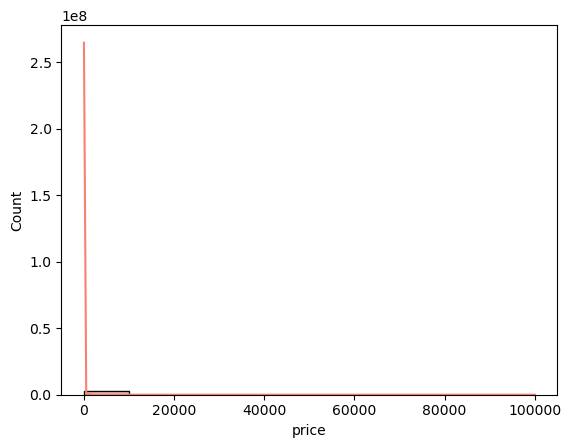

In [ ]:
# Plotting a histogram for the 'price' column
sns.histplot(data['price'], kde=True, bins=10, color="salmon")

C:\Users\ricar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

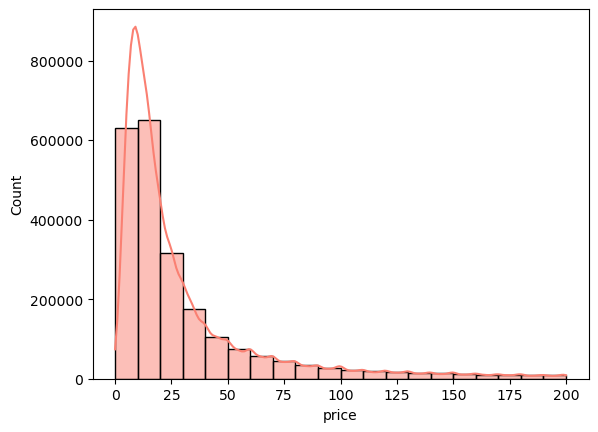

In [ ]:
# Plotting a histogram for the filtered 'price' column 
sns.histplot(filtered_data['price'], kde=True, bins=20, color="salmon")

<Axes: >

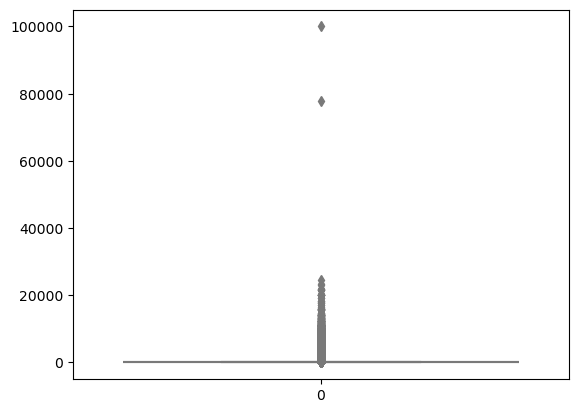

In [ ]:
# Plotting a boxplot for the 'price' column
sns.boxplot(data = data['price'], color="lightblue")

<Axes: >

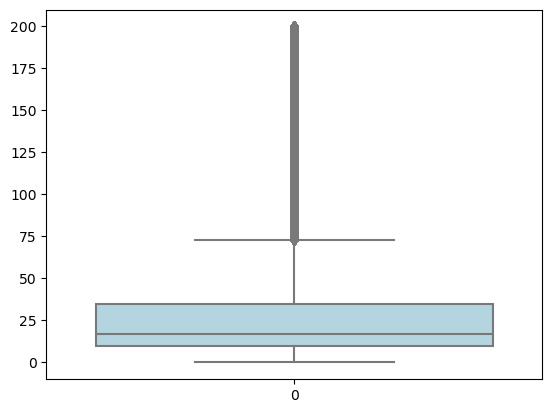

In [ ]:
# Plotting a boxplot for the filtered 'price' column
sns.boxplot(data = filtered_data['price'], color="lightblue")

Measures of Centrality:

Mean Price:    $89.17
Median Price:  $19.09
Mode Price:    $9.99

The most common price in the data is $9.99, a very common and affortible price for online shopping. But the mean seems a little high with a value of $89.17. This is due to the ridiculously high prices listed in the data. These outliers affect these measures and the data's centrality.



Measures of Dispersion:

Variance: 112,892.40
Standard Deviation: 335.99
Range: 24674.59
Interquartile Range: 36.0

A variance of 112,892.40 is quite high, suggesting a significant spread in the product prices. A standard deviation of 335.99 indicates that, on average, product prices deviate from the mean price by about 336 units. This is a considerable deviation, indicating a wide distribution of prices.



Visualizations:

The original data's visualizations are challenging to interpret due to the presence of extreme outliers. By filtering out prices higher than $200, the visualizations become much clearer. This adjustment helps us visualize the distribution of product prices without the distortion caused by extremely high values, offering a more accurate picture of common price ranges. The most popular price ranges for UK residents appear to be between $5 and $15. Beyond this range, the frequency of prices starts to decline.

Part 3: Unpacking Product Ratings

Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

In [ ]:
# Measures of centrality for ratings
mean_rating = data['stars'].mean()
median_rating = data['stars'].median()
mode_rating = data['stars'].mode()[0]

print(f"Mean Rating: {mean_rating}")
print(f"Median Rating: {median_rating}")
print(f"Mode Rating: {mode_rating}")

print("---------------------------------------")

# Measures of dispersion for ratings
variance_rating = data['stars'].var()
std_dev_rating = data['stars'].std()
iqr_rating = data['stars'].quantile(0.75) - data['stars'].quantile(0.25)

print(f"Variance: {variance_rating}")
print(f"Standard Deviation: {std_dev_rating}")
print(f"Interquartile Range: {iqr_rating}")

print("---------------------------------------")

# Skewness and kurtosis for ratings
skewness_rating = data['stars'].skew()
kurtosis_rating = data['stars'].kurt()

print(f"Skewness: {skewness_rating}")
print(f"Kurtosis: {kurtosis_rating}")

Mean Rating: 2.152836472966065
Median Rating: 0.0
Mode Rating: 0.0
---------------------------------------
Variance: 4.81743402976196
Standard Deviation: 2.1948653785054697
Interquartile Range: 4.4
---------------------------------------
Skewness: 0.08120735761080985
Kurtosis: -1.9260061280432985


C:\Users\ricar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='stars', ylabel='Count'>

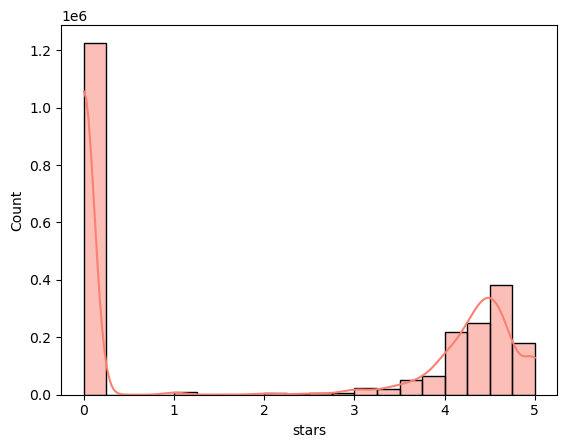

In [ ]:
# Plotting a histogram for the 'stars' (ratings) column
sns.histplot(data['stars'], kde=True, bins=20, color="salmon")

Measures of Centrality:

Mean Rating: 2.2
Median Rating: 0.0
Mode Rating: 0.0

The average rating for these products tends to be generally low, with a mean rating of 2.2. The most common rating is 0, which reflects poorly on the products' reputation.


Measures of Dispersion:

Variance: 4.8
Standard Deviation: 2.2
Interquartile Range: 4.4

The given measures of dispersion indicate that there is a notable variation in customer feedback. The standard deviation of approximately 2.19 points, along with an IQR of 4.4, suggests that ratings are not tightly clustered around the mean but are spread out over a wider range. Therefore, customer ratings show a significant spread, implying that there is a wide variation in how customers rate the products.


Shape of the distribution:

Skewness: 0.08120735761080985
Kurtosis: -1.9260061280432985

The ratings distribution shows a significant concentration of ratings at the lower end (0 rating), which dominates the histogram. Despite the slight positive skewness, the distribution is relatively flat, suggesting a wide spread of ratings with a notable number of extremely low ratings.

This distribution suggests that many products received very poor ratings, while the rest are more evenly distributed across the higher ratings, with a slight tendency towards better ratings.

Business-Centric Report:

- The significant number of low ratings suggests a need for quality improvement in products.
- Customer feedback mechanisms should be enhanced to address and rectify issues leading to low ratings.
- Focusing on products with higher ratings can help in understanding successful attributes and replicating them across the product line.

Overall Recommendations:

Product Strategy:
- Enhance the quality and reliability of products to improve customer satisfaction and ratings.
- Focus on the most popular categories for inventory and marketing efforts.

Pricing Strategy:
- Target the popular price range of $5 to $15 to attract more customers.
- Consider tiered pricing strategies to cater to different market segments.

Customer Feedback:
- Implement robust customer feedback mechanisms to identify and address issues promptly.
- Use positive customer feedback to highlight successful products and improve underperforming ones.